In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression # Logistic Regression Implementation
from sklearn.ensemble import GradientBoostingClassifier # Ensemble Method (Gradient Boosting)
from sklearn.ensemble import RandomForestClassifier # Random Forest Implementation
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
file_path = '/content/Microplastics.xlsx'
data = pd.read_excel(file_path)

# Display basic information about the dataset and the first few rows
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15144 entries, 0 to 15143
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Wave length   15144 non-null  float64
 1   %T            15144 non-null  float64
 2   Acroymn       12620 non-null  object 
 3   Label         15144 non-null  object 
dtypes: float64(2), object(2)
memory usage: 473.4+ KB


(None,
    Wave length          %T Acroymn          Label
 0    399.509630  70.796782      PP  Polypropylene
 1    400.936451  71.016801      PP  Polypropylene
 2    402.363271  70.745946      PP  Polypropylene
 3    403.790091  70.484144      PP  Polypropylene
 4    405.216911  69.940820      PP  Polypropylene)

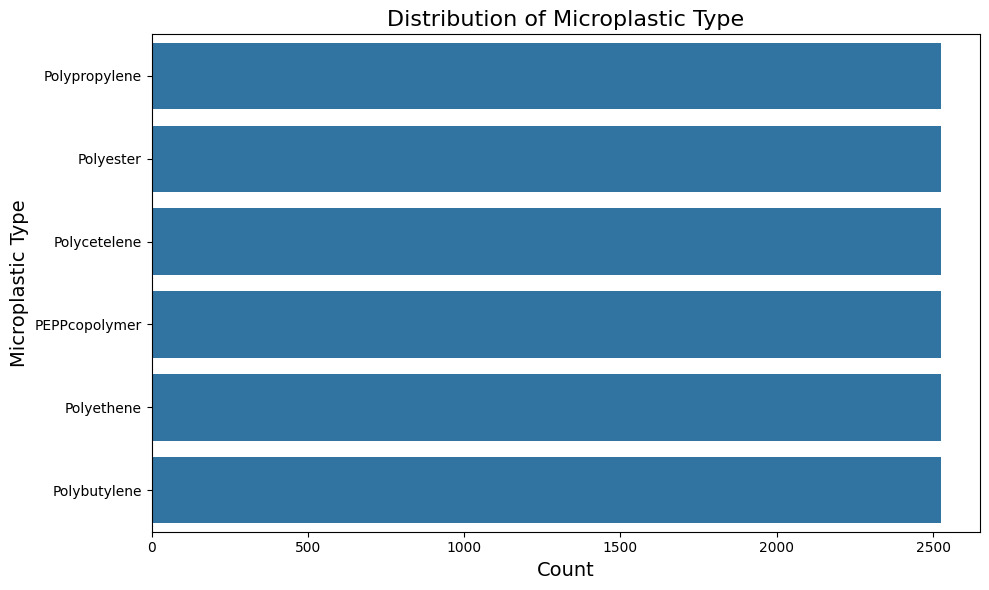

,count
Label,
Polypropylene,2524
Polyester,2524
Polycetelene,2524
PEPPcopolymer,2524
Polyethene,2524
Polybutylene,2524


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Label'], order=data['Label'].value_counts().index)
plt.title('Distribution of Microplastic Type', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Microplastic Type', fontsize=14)
plt.tight_layout()
plt.show()

# Value counts for each class
data['Label'].value_counts()


In [ ]:
# Function to display evaluation metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=label_encoders['Label'].classes_)

    print(f"Accuracy for {model_name}: {accuracy:.2f}")
    print("\nClassification Report:\n", class_report)

    # Display confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoders['Label'].classes_)
    disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # Return results for summary
    return accuracy

Accuracy for Logistic Regression: 0.23

Classification Report:
                precision    recall  f1-score   support

PEPPcopolymer       0.29      0.27      0.28       631
 Polybutylene       0.12      0.08      0.09       631
 Polycetelene       0.28      0.66      0.39       631
    Polyester       0.18      0.13      0.15       631
   Polyethene       0.33      0.04      0.07       631
Polypropylene       0.17      0.21      0.19       631

     accuracy                           0.23      3786
    macro avg       0.23      0.23      0.20      3786
 weighted avg       0.23      0.23      0.20      3786



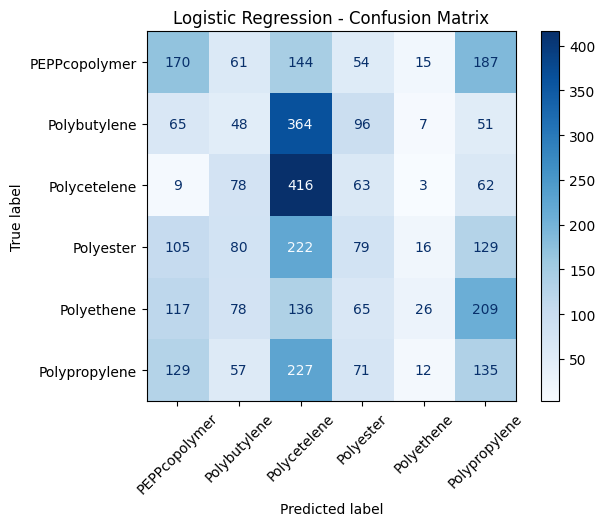

Accuracy for Gradient Boosting: 0.64

Classification Report:
                precision    recall  f1-score   support

PEPPcopolymer       0.63      0.68      0.65       631
 Polybutylene       0.77      0.54      0.63       631
 Polycetelene       0.71      0.75      0.73       631
    Polyester       0.54      0.57      0.56       631
   Polyethene       0.62      0.82      0.71       631
Polypropylene       0.62      0.49      0.55       631

     accuracy                           0.64      3786
    macro avg       0.65      0.64      0.64      3786
 weighted avg       0.65      0.64      0.64      3786



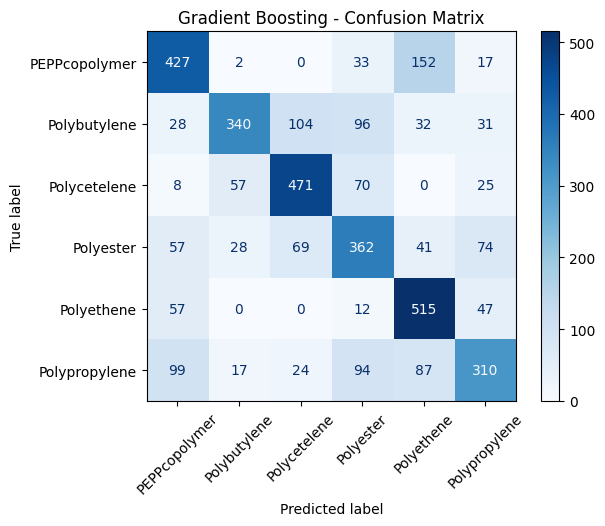

Accuracy for XGBoost: 0.78

Classification Report:
                precision    recall  f1-score   support

PEPPcopolymer       0.78      0.82      0.80       631
 Polybutylene       0.79      0.70      0.74       631
 Polycetelene       0.84      0.84      0.84       631
    Polyester       0.73      0.73      0.73       631
   Polyethene       0.78      0.86      0.82       631
Polypropylene       0.79      0.76      0.77       631

     accuracy                           0.78      3786
    macro avg       0.78      0.78      0.78      3786
 weighted avg       0.78      0.78      0.78      3786



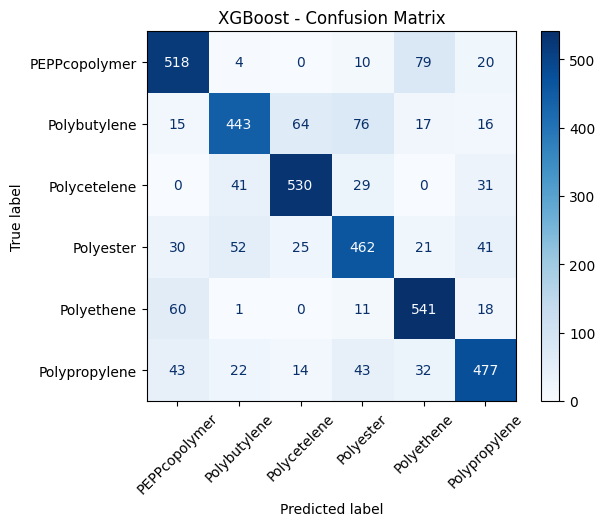

Accuracy for SVM Linear: 0.24

Classification Report:
                precision    recall  f1-score   support

PEPPcopolymer       0.24      0.31      0.27       631
 Polybutylene       0.30      0.15      0.20       631
 Polycetelene       0.28      0.61      0.38       631
    Polyester       0.15      0.09      0.12       631
   Polyethene       0.20      0.13      0.16       631
Polypropylene       0.23      0.18      0.20       631

     accuracy                           0.24      3786
    macro avg       0.23      0.24      0.22      3786
 weighted avg       0.23      0.24      0.22      3786



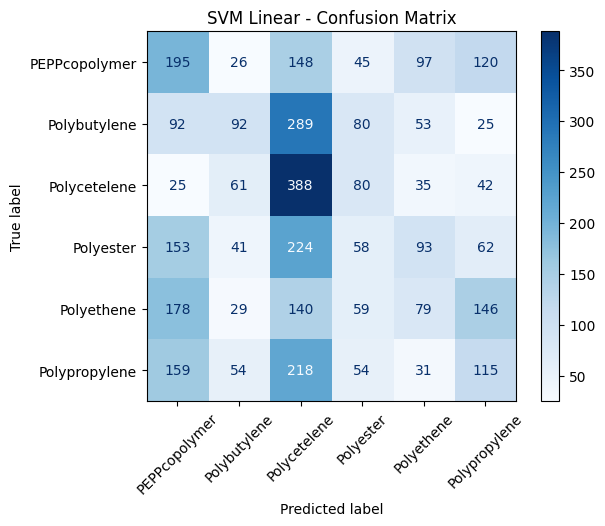

Accuracy for SVM RBF: 0.46

Classification Report:
                precision    recall  f1-score   support

PEPPcopolymer       0.46      0.50      0.48       631
 Polybutylene       0.54      0.40      0.46       631
 Polycetelene       0.49      0.49      0.49       631
    Polyester       0.41      0.48      0.44       631
   Polyethene       0.45      0.73      0.55       631
Polypropylene       0.50      0.18      0.26       631

     accuracy                           0.46      3786
    macro avg       0.47      0.46      0.45      3786
 weighted avg       0.47      0.46      0.45      3786



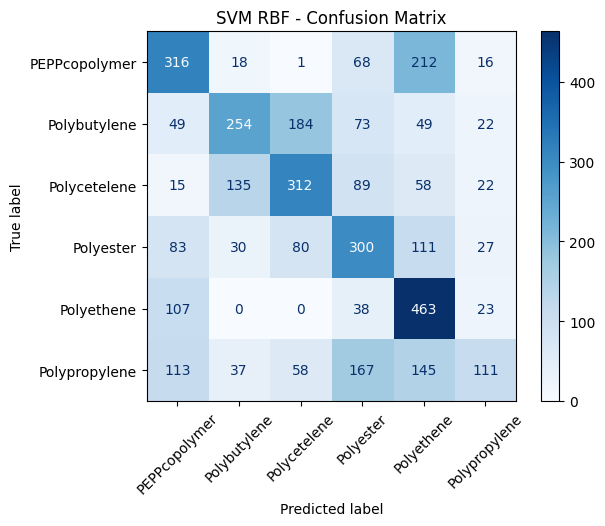

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy for MLP Neural Network: 0.43

Classification Report:
                precision    recall  f1-score   support

PEPPcopolymer       0.42      0.23      0.30       631
 Polybutylene       0.35      0.07      0.12       631
 Polycetelene       0.47      0.68      0.55       631
    Polyester       0.40      0.36      0.38       631
   Polyethene       0.41      0.85      0.55       631
Polypropylene       0.49      0.39      0.43       631

     accuracy                           0.43      3786
    macro avg       0.42      0.43      0.39      3786
 weighted avg       0.42      0.43      0.39      3786



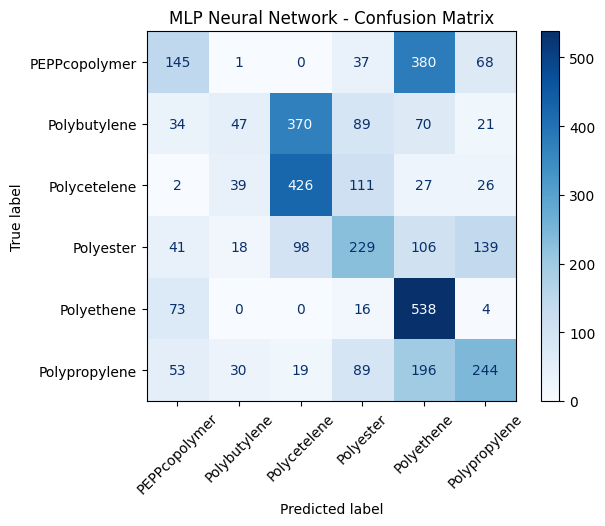

In [ ]:
# Encode categorical features and target variable
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Separate features and target variable
X = data.drop(columns=['Label','Acroymn'])
y = data['Label']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify=y, random_state=42)

# Initialize 5-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepare placeholders for results
results = {}

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
results['Logistic Regression'] = evaluate_model(log_reg, X_test, y_test, "Logistic Regression")

# Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)
results['Gradient Boosting'] = evaluate_model(gradient_boosting, X_test, y_test, "Gradient Boosting")

# XGBoost Classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
results['XGBoost'] = evaluate_model(xgb, X_test, y_test, "XGBoost")

# Support Vector Machine with linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
results['SVM Linear'] = evaluate_model(svm_linear, X_test, y_test, "SVM Linear")

# Support Vector Machine with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
results['SVM RBF'] = evaluate_model(svm_rbf, X_test, y_test, "SVM RBF")

# Neural Network with grid search for learning rate and optimizer
param_grid = {
    'hidden_layer_sizes': [(5,), (10, 5)],
    'learning_rate_init': [0.1, 0.5, 0.05, 0.01, 0.001],
    'solver': ['adam', 'sgd'],
    'max_iter': [100]
}
mlp = MLPClassifier(random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
results['MLP Neural Network'] = evaluate_model(grid_search.best_estimator_, X_test, y_test, "MLP Neural Network")

